**1. LOAD DATA**

In [5]:
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

 98% 665M/675M [00:06<00:00, 158MB/s]
100% 675M/675M [00:06<00:00, 105MB/s]


In [6]:
# jika anda ingin menggunakan kaggle API untuk mengunduh dataset gunakan
# kode berikut untuk membantu anda membuat config kaggle.json
# pastikan anda mendaftar akun kaggle terlebih dahulu
# kemudian menuju halaman my account dan buat token API anda

api_token = {"username":"ccaliza","key":"05b74c0d0ee9d6eb049096e84efca7bf"}
import json
import zipfile
import os
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

In [7]:
import os
import zipfile

local_zip = '/content/cell-images-for-detecting-malaria.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

In [8]:
import os
base_dataset = "cell_images"
class_dir = ['Parasitized','Uninfected']
for class_item in class_dir:
  cur_dir = base_dataset+"/"+class_item
  dataset = os.listdir(cur_dir)
  for item in dataset:
    if not item.endswith(".png"):
        os.remove(os.path.join(cur_dir, item))

In [9]:
from os import mkdir

mkdir('/content/model_cell_images')
mkdir('/content/model_cell_images/train')
mkdir('/content/model_cell_images/train/Parasitized')
mkdir('/content/model_cell_images/train/Uninfected')
mkdir('/content/model_cell_images/validation')
mkdir('/content/model_cell_images/validation/Parasitized')
mkdir('/content/model_cell_images/validation/Uninfected')

In [10]:
# Hasil pengerjaan point 1.2
import os
import shutil

Parasitized_original = "/content/cell_images/Parasitized"
Parasitized_train = "/content/model_cell_images/train/Parasitized"
Parasitized_validation = "/content/model_cell_images/validation/Parasitized"

files = os.listdir(Parasitized_original)

# memindahkan 70% file
for file in files[0:int(len(files) * .7)]:
  new_path = shutil.move(f"{Parasitized_original}/{file}", Parasitized_train)

In [11]:
files2 = os.listdir(Parasitized_original)

# memmindahkan sisa(seluruh file)
for file in files2:
    new_path = shutil.move(f"{Parasitized_original}/{file}", Parasitized_validation)

In [12]:
Uninfected_original = "/content/cell_images/Uninfected"
Uninfected_train = "/content/model_cell_images/train/Uninfected"
Uninfected_validation = "/content/model_cell_images/validation/Uninfected"

filesUn = os.listdir(Uninfected_original)

# memindahkan 70% file
for file in filesUn[0:int(len(filesUn) * .7)]:
    new_path = shutil.move(f"{Uninfected_original}/{file}", Uninfected_train)

In [13]:
files2Un = os.listdir(Uninfected_original)

# memmindahkan sisa(seluruh file)
for file in files2Un:
    new_path = shutil.move(f"{Uninfected_original}/{file}", Uninfected_validation)

In [14]:
# Hasil pengerjaan point 1.3
file_train_Para = os.listdir(Parasitized_train)
file_Val_Para = os.listdir(Parasitized_validation)
file_train_Un = os.listdir(Uninfected_train)
file_Val_Un = os.listdir(Uninfected_validation)

print(file_train_Para[0:int(len(file_train_Para) * .001)])
print("data Parasitized train : " + str(len(file_train_Para)))
print("data Parasitized validation : " + str(len(file_Val_Para)))
print("data Uninfected train : " + str(len(file_train_Un)))
print("data Uninfected validation : " + str(len(file_Val_Un)))

['C182P143NThinF_IMG_20151201_172216_cell_175.png', 'C59P20thinF_IMG_20150803_111333_cell_146.png', 'C101P62ThinF_IMG_20150923_165215_cell_9.png', 'C116P77ThinF_IMG_20150930_171558_cell_115.png', 'C33P1thinF_IMG_20150619_114756a_cell_181.png', 'C93P54ThinF_IMG_20150821_163640_cell_208.png', 'C59P20thinF_IMG_20150803_115303_cell_19.png', 'C116P77ThinF_IMG_20150930_172112_cell_69.png', 'C149P110ThinF_IMG_20151115_114910_cell_286.png']
data Parasitized train : 9645
data Parasitized validation : 4134
data Uninfected train : 9645
data Uninfected validation : 4134


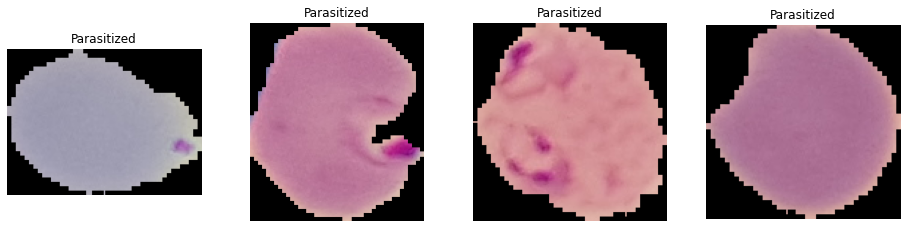

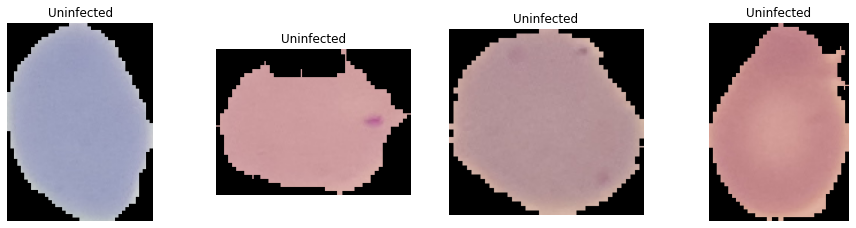

In [15]:
# Hasil pengerjaan point 1.4
import matplotlib.pyplot as plt
import matplotlib.image as mping

Parasitized_dir=os.path.join('/content/model_cell_images/train/Parasitized')
Uninfected_dir=os.path.join('/content/model_cell_images/train/Uninfected')

Parasitized_image = os.listdir(Parasitized_dir)
Uninfected_image = os.listdir(Uninfected_dir)

fname1 = [os.path.join(Parasitized_dir,fname)
        for fname in Parasitized_image[:4]]

fname2 = [os.path.join(Uninfected_dir,fname)
        for fname in Uninfected_image[:4]]

ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname1):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('Parasitized')
    plt.imshow(img)
plt.show()

ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname2):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('Uninfected')
    plt.imshow(img)
    
plt.show()